In [12]:
import pandas as pd
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
warnings.filterwarnings('ignore')
# Lets import the data from the CSV file
loandata=pd.read_csv("loan.csv",header=0)
#Let's have a look
loandata.head(5)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
# Let us now Searching for Missings,type of data and also 
#get to know the shape of data
print(loandata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [14]:
#It is observed that there are a lot of columns with 100% null values. 
#Let's get rid of those collumns first and simplify our data

loandata.dropna(axis = 1, how = 'all', inplace = True)
loandata.shape
# From 111 collumns, we now have only 57 relevant collumns




(39717, 57)

In [15]:
#Next step is let us check if the data is free of any anomaly. 
#The loan_amnt is the amount applied by potential borrowers, 
#funded_amnt is the amount recommended/approved by Lending Club, 
#and the funded_amnt_inv is the amount funded by investors.

# In every case,funded_amnt_inv <= funded_amnt <=loan_amnt

#Any other case is an anomaly which needs to be investigated as this
#makes no sense. Such entries ought to be deleted as they will distort our
#analysis

#First let  us check whether funded_amnt is less than or equal to loan_amnt  
checkpoint1=loandata['funded_amnt']<=loandata['loan_amnt']
print(checkpoint1[checkpoint1==False])
#We can thus conclude that there are no rows where funded_amnt is more than
#loan_amnt

# Second check for anomaly is whether funded_amnt_inv is less than or equal
#to funded_amnt
checkpoint2=loandata['funded_amnt_inv']<=loandata['funded_amnt']
print(checkpoint2[checkpoint2==False])
# There is no anomaly here also. So the data is clean of anomalies





Series([], dtype: bool)
Series([], dtype: bool)


The customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. So we are removing them and simplifying our data. We have identified the following to be customer behavior variables. 

1. delinq_2yrs
2. revol_bal
3. out_prncp
4. total_pymnt
5. total_rec_prncp
6. total_rec_int
7. total_rec_late_fee
8. recoveries
9. collection_recovery_fee
10. last_pymnt_d
11. last_pymnt_amnt
12. next_pymnt_d
13. chargeoff_within_12_mths
14. mths_since_last_delinq
15. mths_since_last_record

We also need to drop some irrelevant collumns that wont help us in analysis 
at all
These are 
1. "id", 
2. "member_id", 
3. "url", 
4. "title", 
5. "emp_title", 
6. "zip_code", 
7. last_credit_pull_d", 
8. "addr_state",
9. "desc",
10. "out_prncp_inv",
11. "total_pymnt_inv",
12. "funded_amnt"



In [1]:
# We also need to drop some irrelevant collumns that wont help us in analysis 
#at all
#These are "id", "member_id", "url", "title", "emp_title", "zip_code", 
#"last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt"


                


In [17]:
loandata.shape
#57 collumns are there now

(39717, 57)

In [18]:
#Executing the command to remove these
loandata.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [20]:
loandata.shape
#We now have 30 collumns. Out of these 30 collumns also, we see that there are  
#plenty of single valued collumns which are useless for our analysis
# So lets remove them also

(39717, 30)

In [21]:
#Executing command to remove single valued collumns
loandata.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)


In [22]:
#Checking no of collumns again
loandata.shape
# 21 collumns now

(39717, 21)

In [23]:
# Let us also remove the records whose loan status is current.
# Lets also create a new data base to store this data

loan_analysis = loandata[loandata.loan_status != "Current"]

In [24]:
loan_analysis.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [33]:
loan_analysis.shape

(38577, 21)

In [34]:
# Let's check for missing values and observe if they are significant
# If missing values are 60%+ of total number of rows, we need to exclude 
(loan_analysis.isna().sum()/len(loan_analysis.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

Based on the observation above, it does not seem necessary to exclude
any further columns as missing values are not significant enough to distort
our analysis. 
We can use imputation to replace the missing values
Some of the techniques that can be used for imputation are 

1. Replacing with Median or Mode
2. K-nearest neighbour model

We are however continuing our analysis with the missing values as they are not very much significant.


<AxesSubplot:xlabel='annual_inc'>

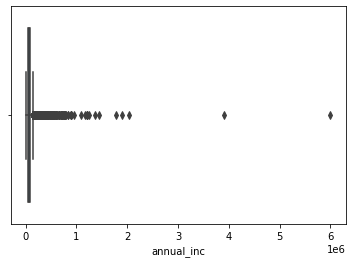

In [36]:
# Check Outliers
sns.boxplot(loan_analysis['annual_inc'])

There are outliers and we need to remove them. Before removing them we need to check. Let  us check beyond 95 percentile values


In [37]:
perc = loan_analysis.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
perc

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [38]:
# Removing outliers
per_95p_annual_inc=loan_analysis['annual_inc'].quantile(0.95)

loan_cleaned=loan_analysis[loan_analysis.annual_inc<=per_95p_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

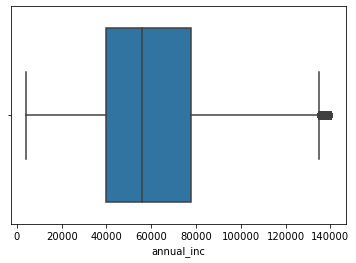

In [39]:
#Checking again
sns.boxplot(loan_cleaned.annual_inc)

Now the data looks good. Let us also analyse for some other columns
    

<AxesSubplot:xlabel='dti'>

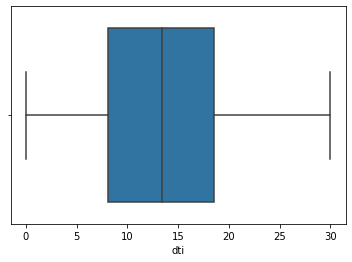

In [40]:
sns.boxplot(loan_analysis.dti)

No significant outliers and so no need to remove them


<AxesSubplot:xlabel='funded_amnt_inv'>

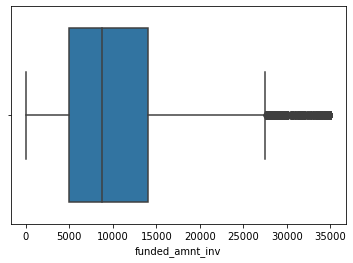

In [41]:
sns.boxplot(loan_analysis.funded_amnt_inv)

Let us check the percentiles also since we are not able to rule out outliers from the boxplot


In [42]:
loan_analysis.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8733.440000
0.750    14000.000000
0.900    19975.000000
0.950    24500.066590
0.970    25750.000000
0.975    27975.000000
0.980    29879.258133
0.985    30000.000000
0.990    34715.012285
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

Few extreme values seems fine and so we are not removing the outliers.


<AxesSubplot:xlabel='loan_amnt'>

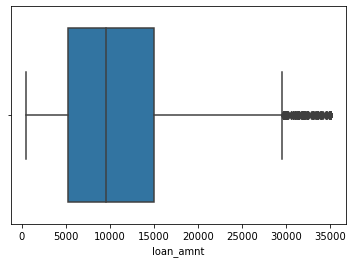

In [43]:
sns.boxplot(loan_analysis.loan_amnt)

We need to check percentiles to see if outliers are significant


In [44]:
loan_analysis.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

Few extreme values seems fine and so we are not removing the outliers.

We found outliers in annual_inc which we have removed. So we have now created a new data in loan_cleaned which will be further used. loan_analysis is no more relevant


<AxesSubplot:xlabel='loan_status', ylabel='count'>

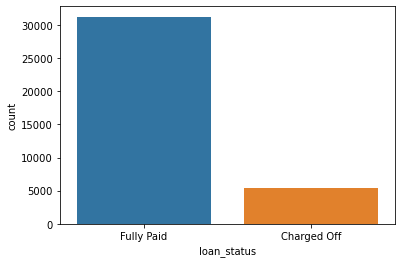

In [45]:
sns.countplot(x = 'loan_status', data = loan_cleaned)

We need to analyse the data only for which there are defaults.

We would be subsetting the data while plotting only for 'Charged Off' loan_status for below plots. This is because we need to analyse just the default data. 


In [46]:
loan_cleaned.sub_grade = pd.to_numeric(loan_cleaned.sub_grade.apply(lambda x : x[-1]))
loan_cleaned.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

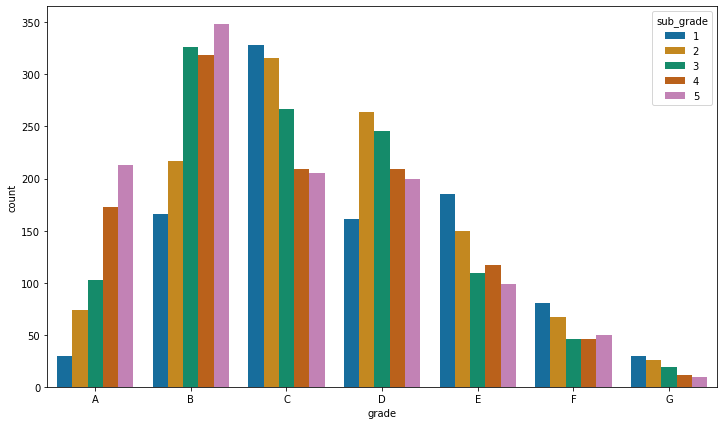

In [47]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

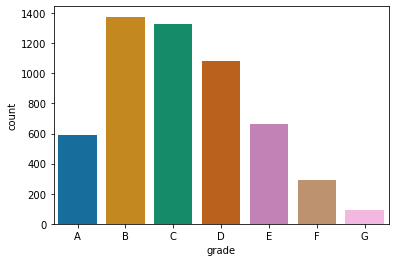

In [49]:
sns.countplot(x = 'grade', data = loan_cleaned[loan_cleaned.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

ANALYSIS OF DEAFULTS BASED ON THE PURPOSE OF LOAN 

<AxesSubplot:xlabel='count', ylabel='purpose'>

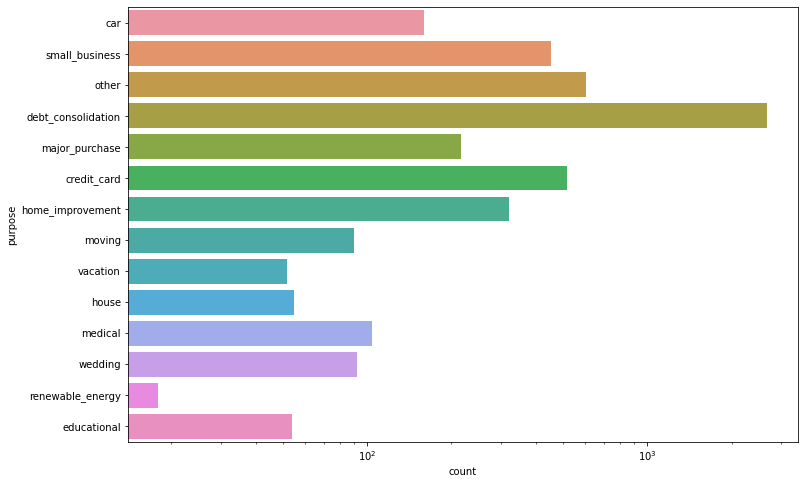

In [52]:
# using Log Scale
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])


ANALYSIS OF DEFAULTS BASED ON HOME OWNERSHIP

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

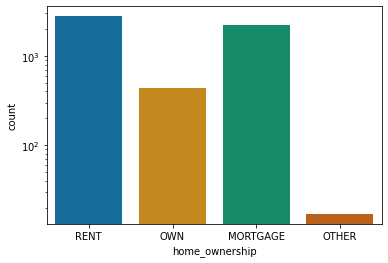

In [53]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

For proper visualization of other numerical columns, it is essential to make them categorical by binning them. This will enable us analyse them by range for defaults.
1. int_rate
2. open_acc

3. total_acc
4. annual_inc



In [60]:
loan_cleaned['int_rate_groups'] = pd.cut(loan_cleaned['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])


In [61]:
loan_cleaned['open_acc_groups'] = pd.cut(loan_cleaned['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

In [62]:
loan_cleaned['total_acc_groups'] = pd.cut(loan_cleaned['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

In [63]:
loan_cleaned['annual_inc_groups'] = pd.cut(loan_cleaned['annual_inc'], bins=5,precision =0,labels =['3T-31T','31T-58T','58T-85T','85T-112T','112T-140T'])

Now, let us analyse interest rates with respect to interest rate bins created

Text(0.5, 0, 'Interest Rate')

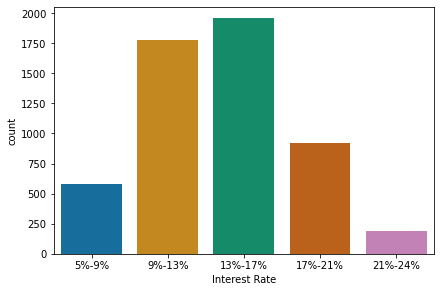

In [70]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')


Now, let us analyse with respect to open_acc

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

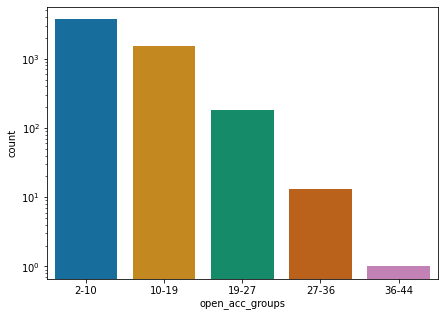

In [72]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

Next, evaluating w.r.t total_acc


<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

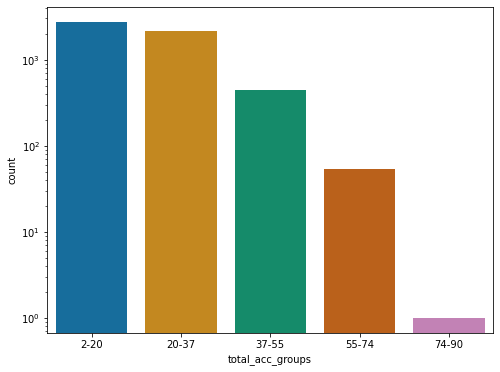

In [74]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

Next, analysing w.r.t annual_inc


<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

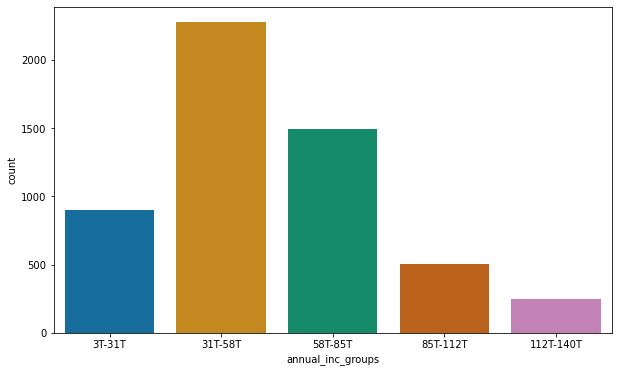

In [75]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

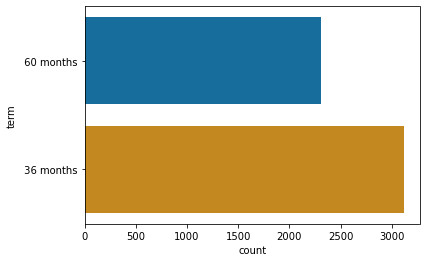

In [76]:
sns.countplot(y='term', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

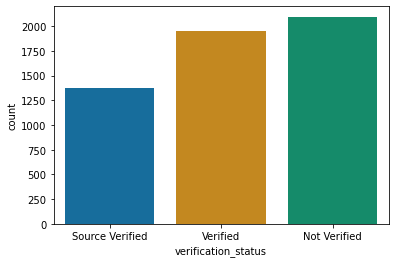

In [77]:
sns.countplot(x='verification_status', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

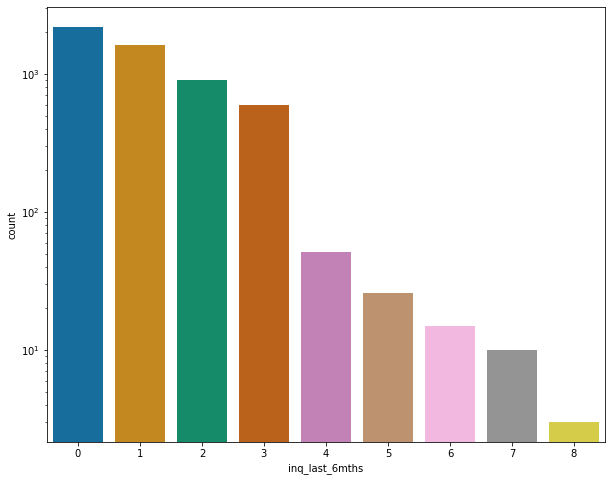

In [78]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

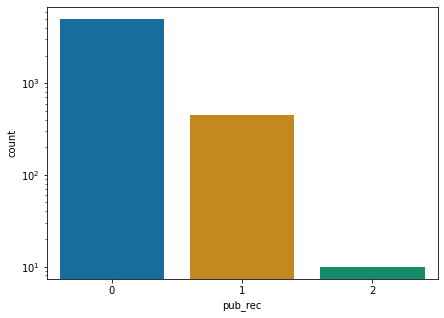

In [79]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

Next, let us analyse by Year and month of loan issue. We however need to perform some extraction operations as the required data is not readily available in any column


In [80]:
df_month_year = loan_cleaned['issue_d'].str.partition("-", True)     
loan_cleaned['issue_month']=df_month_year[0]                       
loan_cleaned['issue_year']='20' + df_month_year[2]

In [81]:
loan_cleaned.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10+ years,RENT,24000.0,...,3,0,83.70%,9,9%-13%,2-10,2-20,3T-31T,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,< 1 year,RENT,30000.0,...,3,0,9.40%,4,13%-17%,2-10,2-20,3T-31T,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10+ years,RENT,12252.0,...,2,0,98.50%,10,13%-17%,2-10,2-20,3T-31T,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10+ years,RENT,49200.0,...,10,0,21%,37,13%-17%,2-10,20-37,31T-58T,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3 years,RENT,36000.0,...,9,0,28.30%,12,5%-9%,2-10,2-20,31T-58T,Dec,2011


<AxesSubplot:xlabel='issue_year', ylabel='count'>

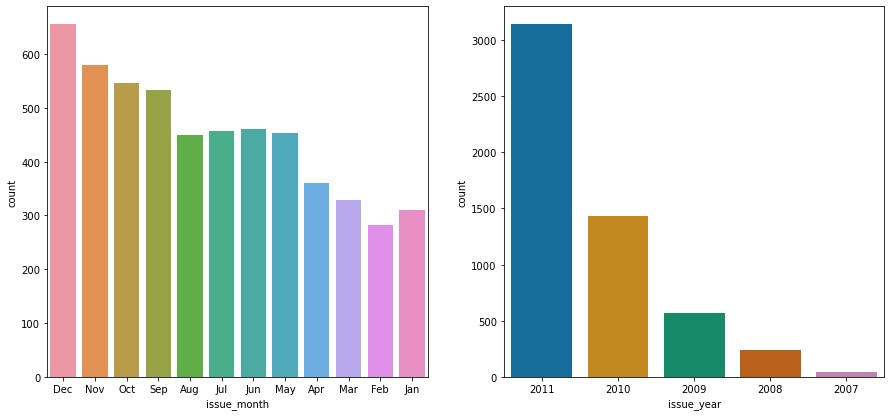

In [82]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

Maximum defaults happened when the loan was sanctioned in Dec. Loan issued in the year 2011 were also more on the deafulter list compared to other years


Now, let us also analyse using installment, DTi and loan amount

In [83]:
loan_cleaned['installment_groups'] = pd.cut(loan_cleaned['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_cleaned['funded_amnt_inv_group'] = pd.cut(loan_cleaned['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_cleaned['loan_amnt_groups'] = pd.cut(loan_cleaned['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_cleaned['dti_groups'] = pd.cut(loan_cleaned['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

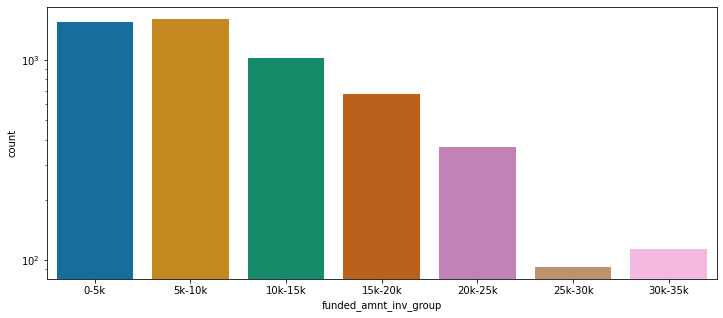

In [84]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

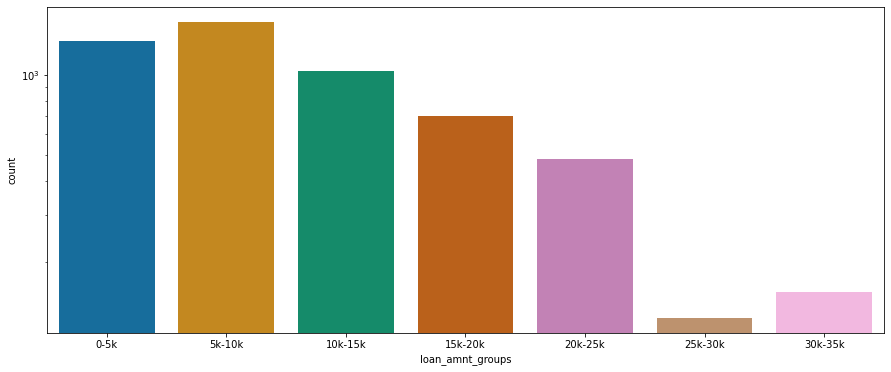

In [85]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

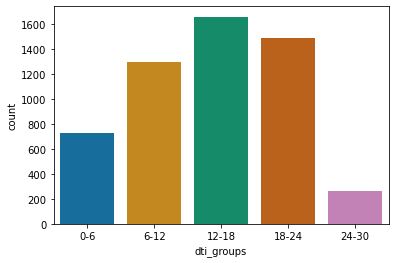

In [86]:
sns.countplot(x='dti_groups', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

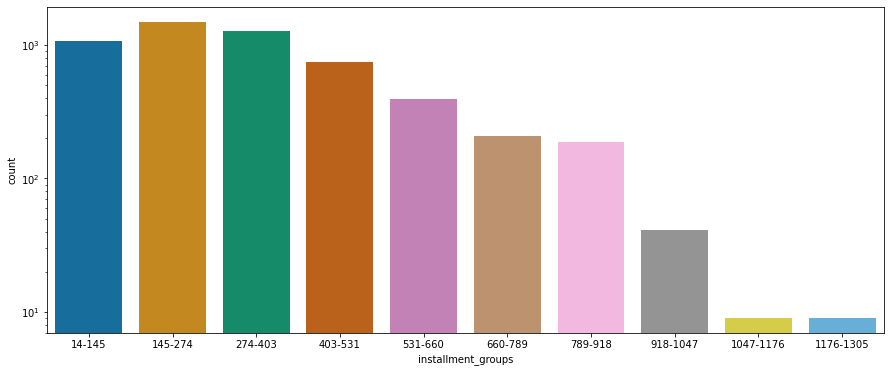

In [87]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

MAJOR OBSERVATIONS
Based on the various visualizations and plots above, we make the following conclusions which might be useful to predict which persons are more likely to default. Although correlation necessarily does not mean causation, here are some observations and likely reasoning in my judgment. 

1. Applicants living in Rented house are more likely to default than those having their own house. This maybe because those having their own house fear their house being mortgaged and attached for recovery.

2. Applicants whose main purpose of taking loan is to clear other loans or consolidate their debts are more likely to default. This can be due to poor financial management techniques used.

3. Applicants receiving interest at the rate of 13%-17% are more likely to default. This is the observation from the data. Correlation doesn't indicate causation, so there is no particular cause as such. 

4. Where installments are between 145-274, the chances of default are higher.

5. Applicants with DTi between 12-18 are more likely to make a default. 

6. Where funded amt  or loan amt  is between 5000-10000, there is more likelihood of default.

7. Maximum defaults occur where verification status is 'Not verified'. Reason is quite obvious as it may have a higher level of fraudulent/ fake applications. 

8. When the number of derogatory public records is 0, there the default is maximum.

9. When the no of enquiries in last 6 months is 0, there the default is maximum.

10. Applicants with income between 31T-58T are most likely to default. No particular cause identified.

11. Grade B and FINAL B5 grade applicants are the highest defaulters according to this data.